# Training Models

## Loading in the data

In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# load in all of the data
sodankyla = pd.read_csv(r"/Users/elliotdable/Documents/UCL/research/fabry_perot_ml/sodankyla_fpi/sodankyla_red_merged.csv")
kiruna = pd.read_csv(r"/Users/elliotdable/Documents/UCL/research/fabry_perot_ml/kiruna_fpi/kiruna_red_merged.csv")

# all datetime columns need to be converted back to datetime from string as pandas cant save them in this format
sodankyla.datetime = pd.to_datetime(sodankyla.datetime)
kiruna.datetime = pd.to_datetime(kiruna.datetime)

In [14]:
sodankyla

,mirror,intensity,intensityError,windSpeed,windSpeedError,temp,tempError,chiSquared,sigToNoiseRatio,datetime,sensorTemp,skyTemp,clarity,light,rain
0,15,19445.41,105.44,-21.77,3.26,409.98,6.53,0.12,24868.0,2019-02-01 15:16:03,2.3,-40.6,42.8,0.0,0.0
1,4,25100.11,79.40,-27.46,2.57,1567.10,14.51,0.37,71291.0,2019-02-01 15:19:09,2.3,-40.8,43.0,0.0,-0.2
2,14,31737.28,106.74,-7.93,2.73,1540.68,15.14,0.38,62523.0,2019-02-01 15:19:46,2.3,-41.7,44.0,0.0,-0.2
3,1,29767.50,98.48,-19.43,2.69,1547.51,14.96,0.37,64765.0,2019-02-01 15:22:52,2.2,-40.4,42.6,0.0,-0.1
4,8,19014.86,69.20,-53.74,2.95,1611.52,17.21,0.59,54783.0,2019-02-01 15:23:21,2.2,-40.4,42.6,0.0,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62021,4,11350.52,140.89,2.41,9.34,2133.92,77.00,0.12,6100.0,2023-02-14 05:07:32,10.8,-7.2,18.0,0.0,-0.1
62022,14,12052.06,142.05,25.17,8.96,2094.00,71.97,0.14,6595.0,2023-02-14 05:08:40,10.8,-7.1,18.0,0.0,-0.1
62023,1,13253.51,150.48,37.98,8.38,2200.38,72.17,0.19,7616.0,2023-02-14 05:09:47,10.8,-6.7,17.5,0.0,-0.2
62024,8,13009.21,72.20,-124.14,4.54,1606.46,26.12,0.58,23378.0,2023-02-14 05:10:16,10.8,-6.7,17.5,0.0,-0.2


In [15]:
kiruna

,mirror,intensity,intensityError,windSpeed,windSpeedError,temp,tempError,chiSquared,sigToNoiseRatio,datetime,sensorTemp,skyTemp,clarity,light,rain
0,8,1036.74,2.41,14.41,1.09,215.49,1.27,2.36,111212.0,2019-02-01 15:04:37,-2.5,-8.3,5.8,0.0,0.6
1,8,3315.85,4.06,1901.73,0.49,242.92,0.71,8.44,275712.0,2019-02-01 15:04:46,-2.5,-8.3,5.8,0.0,0.6
2,8,1668.01,2.95,2.65,1.31,882.96,3.96,2.57,190631.0,2019-02-01 15:10:17,-2.6,-8.4,5.9,0.0,0.7
3,8,3305.77,3.49,1905.15,0.43,244.44,0.62,11.96,372759.0,2019-02-01 15:10:28,-2.6,-8.4,5.9,0.0,0.7
4,8,1674.81,3.05,12.87,1.35,886.85,4.10,2.25,179485.0,2019-02-01 15:16:08,-2.5,-8.2,5.7,0.0,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61630,7,2326.49,12.90,60.70,5.03,1416.70,20.90,0.07,19932.0,2023-03-01 00:56:13,8.2,-4.5,12.6,0.0,0.0
61631,2,1945.92,11.58,61.80,5.39,1411.84,22.33,0.14,17275.0,2023-03-01 00:56:59,8.2,-4.5,12.6,0.0,0.0
61632,8,9781.94,16.49,-0.72,1.18,778.02,3.29,1.43,199311.0,2023-03-01 00:57:37,8.2,-4.5,12.6,0.0,0.0
61633,12,2506.06,11.65,93.38,4.22,1418.58,17.55,0.12,28324.0,2023-03-01 00:58:15,8.2,-4.5,12.6,0.0,0.0


We're going to need ome type of regression algorithm to model relationships between the data

## Regression

Set paramters

In [16]:
# Common imports
import os
import numpy as np
np.random.seed(42) # To make this notebook's output stable across runs

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

Remind us of what column are available to use

In [17]:
sodankyla.keys()

Index(['mirror', 'intensity', 'intensityError', 'windSpeed', 'windSpeedError',
       'temp', 'tempError', 'chiSquared', 'sigToNoiseRatio', 'datetime',
       'sensorTemp', 'skyTemp', 'clarity', 'light', 'rain'],
      dtype='object')

### Linear Regression

Set up a basic Linear regression which uses two columns and initilaise inout and target variables

In [32]:
# Importing necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# choose these as your input (X), an your target (y), chamge them as needed
X = np.array(kiruna.windSpeed).reshape(-1,1)
y = np.array(kiruna.temp).reshape(-1,1)

Perform a simple linear regression

In [33]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Linear Regression model
linear_regression = LinearRegression()

# Training the model
linear_regression.fit(X_train, y_train)

# Making predictions on the testing set
predictions = linear_regression.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 122910.62673405386


Plot the results

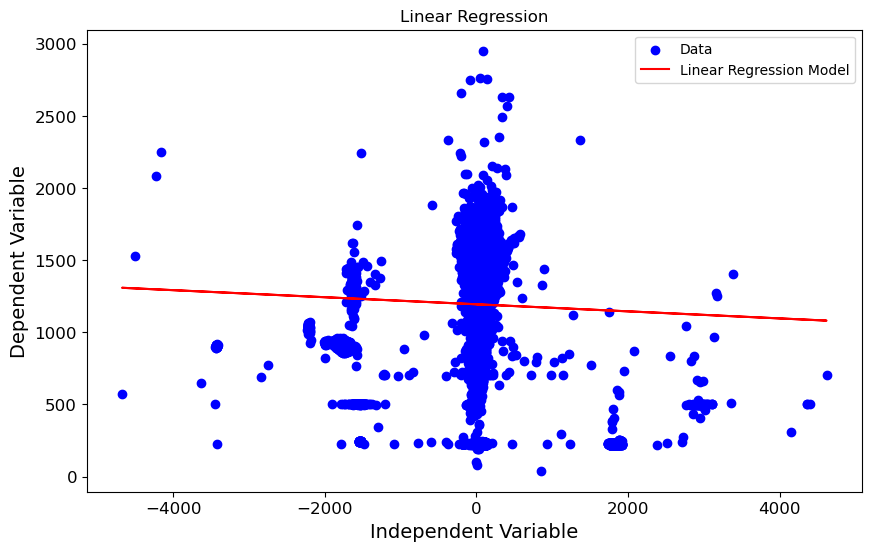

In [38]:
# Scatter plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')

# Plot the regression line
plt.plot(X, linear_regression.predict(X), color='red', label='Linear Regression Model')

# Add labels and title
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Linear Regression')
plt.legend()

### Polynomial Regression

Initialise polynomial linear regression

In [59]:
from sklearn.preprocessing import PolynomialFeatures

# the degree can be adjusted to suit the data
n = 10
poly_features = PolynomialFeatures(degree=n, include_bias=False)

# map the polynomial to transform X, the model output now has n features for each data point
X_poly = poly_features.fit_transform(X)  
X[0], X_poly[0]

(array([14.41]),
 array([1.44100000e+01, 2.07648100e+02, 2.99220912e+03, 4.31177334e+04,
        6.21326539e+05, 8.95331542e+06, 1.29017275e+08, 1.85913894e+09,
        2.67901921e+10, 3.86046668e+11]))

In [60]:
X.shape, X_poly.shape

((61635, 1), (61635, 10))

In [61]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1194.99499353]),
 array([[-9.07206076e-43,  4.99115166e-28, -1.02947056e-30,
         -1.86982837e-33, -4.97400417e-29, -7.10807830e-27,
         -3.43402438e-22, -1.25706136e-25,  1.70216208e-29,
          6.14950448e-33]]))

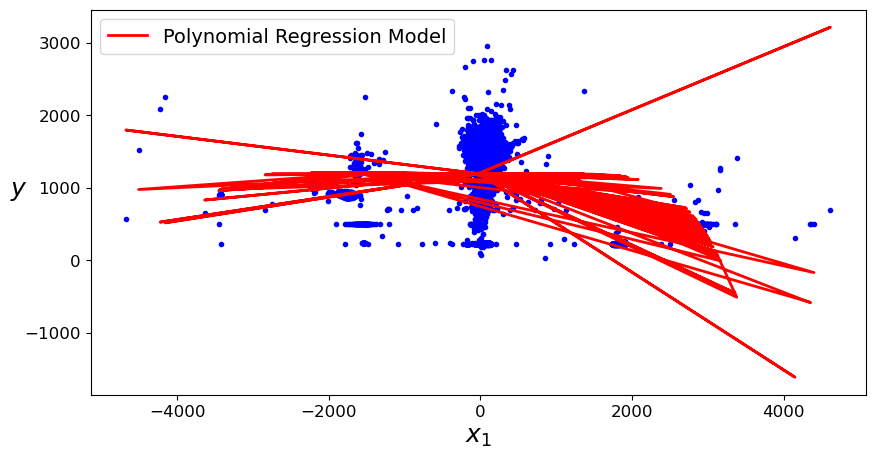

In [62]:
y_pred = lin_reg.predict(X_poly)
plt.figure(figsize=(10,5))
plt.plot(X, y, "b.")
plt.plot(X, y_pred, "r-", linewidth=2, label="Polynomial Regression Model")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

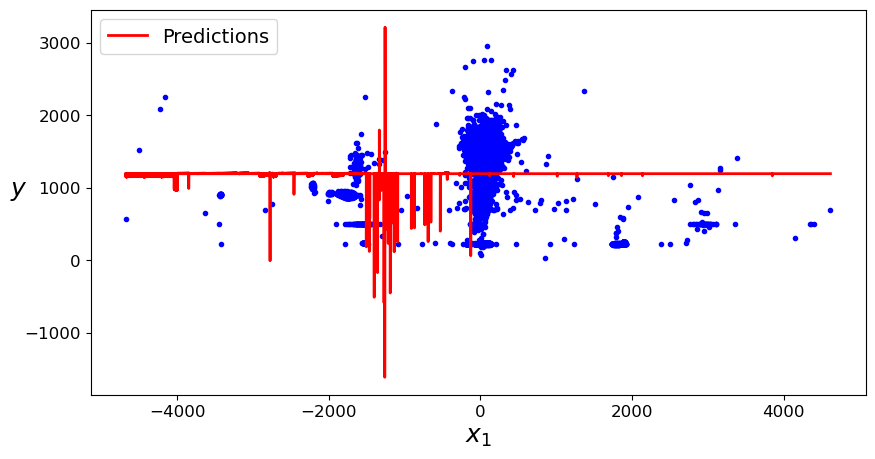

In [71]:
X_new = np.linspace(min(X), max(X), 61635).reshape(61635, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_poly)
plt.figure(figsize=(10,5))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)